In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Example 1
\begin{equation}
f(x) = x^2 - 4x + 6
\end{equation}

In [2]:
def f(x):
    return x**2 - 4*x + 6

# f = lambda x: x**2 - 4*x + 6

In [3]:
NumberOfPoints = 101
x = np.linspace(-5., 5, NumberOfPoints)

In [4]:
fx = f(x)

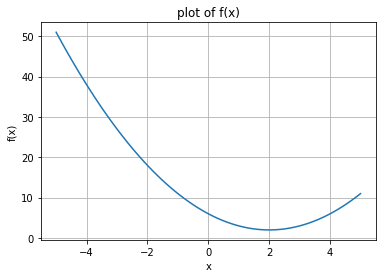

In [5]:
plt.plot(x,fx)
plt.grid()
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('plot of f(x)')
plt.show()

## Newton  Method

With initial $x^{(0)}$, calculate the following equation :
\begin{equation}
x^{(k+1)} = x^{(k)} - \alpha \nabla^2 f(x^{(k)})^{-1}\nabla f(x^{(k)})
\end{equation}

In [6]:
def grad_fx(x):
    return 2*x - 4
def hess_f(x):
    return 2.0

In [7]:
x0 = 0.
MaxIter = 10
for i in range(MaxIter):
#     x1 = x0 - learning_Rate * grad?
    x1 = x0 - grad_fx(x0)/hess_f(x0)
    print(i, x0, f(x0))
    x0 = x1

0 0.0 6.0
1 2.0 2.0
2 2.0 2.0
3 2.0 2.0
4 2.0 2.0
5 2.0 2.0
6 2.0 2.0
7 2.0 2.0
8 2.0 2.0
9 2.0 2.0


In [8]:
def newton_descent(func, grad_func, hess_fun, x0, learning_rate=1, MaxIter=10, verbose=True):
    paths = []
    for i in range(MaxIter):
        x1 = x0 - learning_rate * grad_func(x0) / hess_fun(x0)
        if verbose:
            print('{0:03d} : {1:4.3f}, {2:4.2E}'.format(i, x0, func(x0)))
        x0 = x1
        paths.append(x0)
    return(x0, func(x0), paths)

In [9]:
xopt, fopt, paths = newton_descent(f, grad_fx, hess_f, 0.0)

000 : 0.000, 6.00E+00
001 : 2.000, 2.00E+00
002 : 2.000, 2.00E+00
003 : 2.000, 2.00E+00
004 : 2.000, 2.00E+00
005 : 2.000, 2.00E+00
006 : 2.000, 2.00E+00
007 : 2.000, 2.00E+00
008 : 2.000, 2.00E+00
009 : 2.000, 2.00E+00


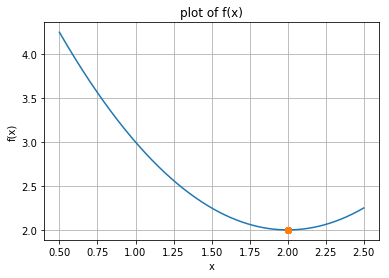

In [10]:
x = np.linspace(0.5, 2.5, 1000)
paths = np.array(paths)
plt.plot(x,f(x))
plt.grid()
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('plot of f(x)')

plt.plot(paths, f(paths), 'o-')
plt.show()

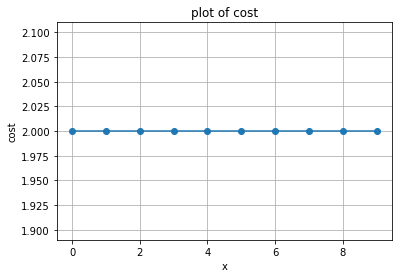

In [11]:
plt.plot(f(paths), 'o-')
plt.grid()
plt.xlabel('x')
plt.ylabel('cost')
plt.title('plot of cost')
plt.show()

In [12]:
from scipy.optimize import minimize
f = lambda x: x**2 - 4*x + 6
x0 = 0.
minimize(f, x0)

      fun: 2.0
 hess_inv: array([[ 0.5]])
      jac: array([  5.96046448e-08])
  message: 'Optimization terminated successfully.'
     nfev: 9
      nit: 2
     njev: 3
   status: 0
  success: True
        x: array([ 2.00000002])

In [13]:
res = minimize(f, x0)
print(res.x, res.fun)

[ 2.00000002] 2.0


## (Additional) non-convex function
\begin{equation}
\min_x x \sin(x)
\end{equation}
1. Define $f(x)$ : loss function
1. Define $\nabla f(x)$ : gradient of $f$
1. Define $\nabla^2 f(x)$ known as Hessian Matrix of $f$
1. Tune parameters : `learning_rate, x0, MaxIter`

In [14]:
x = np.linspace(-2, 8, 501)
f = lambda x : x * np.sin(x)
grad_f = lambda x: np.sin(x) + x * np.cos(x)
hess_f = lambda x: 2 * np.cos(x) - x * np.sin(x)

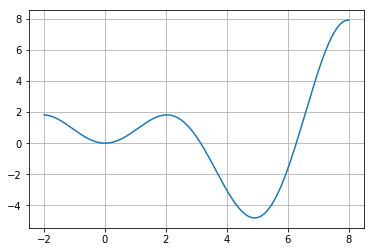

In [15]:
fx = f(x)
plt.plot(x, fx)
plt.grid()
plt.show()

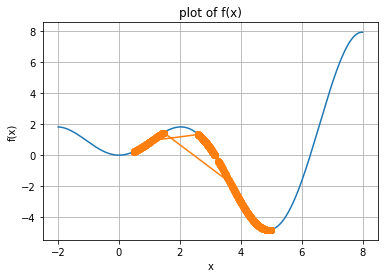

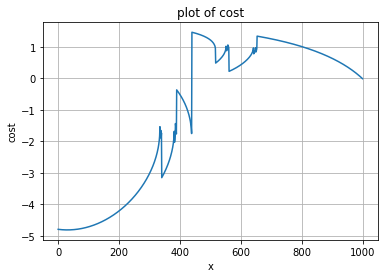

In [16]:
# x0 = 5.7
# MaxIter = 10
# learning_rate = 1.0
x0 = 5.0
MaxIter = 1000
learning_rate = 0.00250
# x0 = -0.2
# MaxIter = 50
# learning_rate = 0.1250

xopt, fopt, paths = newton_descent(f, grad_fx, hess_f, x0, 
                                   MaxIter=MaxIter, learning_rate=learning_rate, verbose=False)

plt.plot(x,f(x))
plt.grid()
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('plot of f(x)')

plt.plot(paths, f(paths), 'o-')
plt.show()
plt.plot(f(paths))
plt.grid()
plt.xlabel('x')
plt.ylabel('cost')
plt.title('plot of cost')
plt.show()

## Example 02
\begin{equation}
f(x, y) = (x-2)^2 + (y-2)^2
\end{equation}

Contour

In [17]:
xmin, xmax, xstep = -4.0, 4.0, .25
ymin, ymax, ystep = -4.0, 4.0, .25

In [18]:
x, y = np.meshgrid(np.arange(xmin, xmax + xstep, xstep), np.arange(ymin, ymax + ystep, ystep))

In [19]:
f = lambda x,y : (x-2)**2 + (y-2)**2

In [20]:
z = f(x, y)

In [21]:
minima = np.array([2., 2.])

In [22]:
f(*minima)

0.0

In [23]:
minima_ = minima.reshape(-1, 1)

In [24]:
from visualize import surf

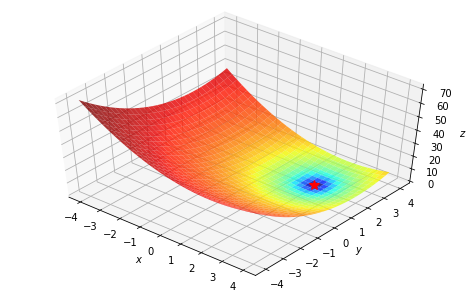

In [25]:
surf(f, x, y, minima=minima_)

In [26]:
from visualize import contour_with_quiver

In [27]:
grad_f_x = lambda x, y: 2 * (x-2)
grad_f_y = lambda x, y: 2 * (y-2)

In [28]:
hessian_f = lambda x, y: np.array([[2.0, 0.0],[0.0, 2.0]])

In [29]:
x0 = np.array([-2., -2.])
MaxIter = 10
learning_rate = 1
for i in range(MaxIter):
    grad = np.array([grad_f_x(*x0), grad_f_y(*x0)])
    hess = hessian_f(*x0)
    x1 = x0 - learning_rate * np.linalg.solve(hess, grad)# Key points
    fval = f(*x0)
    print(i, x0, fval)
    x0 = x1

0 [-2. -2.] 32.0
1 [ 2.  2.] 0.0
2 [ 2.  2.] 0.0
3 [ 2.  2.] 0.0
4 [ 2.  2.] 0.0
5 [ 2.  2.] 0.0
6 [ 2.  2.] 0.0
7 [ 2.  2.] 0.0
8 [ 2.  2.] 0.0
9 [ 2.  2.] 0.0


In [30]:
def newton_descent_2d(func, gradx, grady, hessian, x0, MaxIter=10, learning_rate=1, verbose=True):
    paths = [x0]
    fval_paths = [f(x0[0], x0[1])]
    for i in range(MaxIter):
        grad = np.array([grad_f_x(*x0), grad_f_y(*x0)])
        hess = hessian(*x0)
        x1 = x0 - learning_rate * np.linalg.solve(hess, grad)
        fval = f(*x0)
        if verbose:
            print(i, x0, fval)
        x0 = x1
        paths.append(x0)
        fval_paths.append(fval)
    paths = np.array(paths)
    paths = np.array(np.matrix(paths).T)
    fval_paths = np.array(fval_paths)
    return(x0, fval, paths, fval_paths)

In [31]:
x0 = np.array([-2., -2.])
xopt, fopt, paths, fval_paths = newton_descent_2d(f, grad_f_x, grad_f_y, hessian_f, x0)

0 [-2. -2.] 32.0
1 [ 2.  2.] 0.0
2 [ 2.  2.] 0.0
3 [ 2.  2.] 0.0
4 [ 2.  2.] 0.0
5 [ 2.  2.] 0.0
6 [ 2.  2.] 0.0
7 [ 2.  2.] 0.0
8 [ 2.  2.] 0.0
9 [ 2.  2.] 0.0


In [32]:
from visualize import contour_with_path

/Users/jacob/anaconda/envs/fastcampus/lib/python3.6/site-packages/matplotlib/contour.py:1518: UserWarning: Log scale: values of z <= 0 have been masked
  warnings.warn('Log scale: values of z <= 0 have been masked')


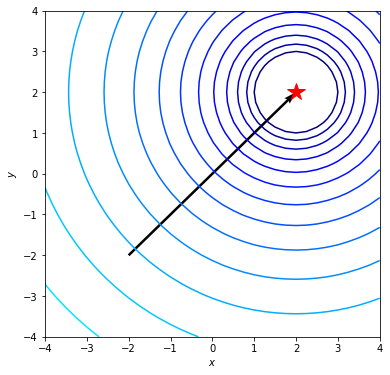

In [33]:
contour_with_path(f, x, y, paths, minima=np.array([[2],[2]]))

## Example 03
\begin{equation}
f(x, y) = 3(x-2)^2 + (y-2)^2
\end{equation}

In [34]:
f = lambda x,y : 3*(x-2)**2 + (y-2)**2

In [35]:
grad_f_x = lambda x, y: 6 * (x-2)
grad_f_y = lambda x, y: 2 * (y-2)

hessian_f = lambda x, y: np.array([[6.0, 0.0],[0.0, 2.0]])

In [36]:
xopt, fopt, paths, fval_paths = newton_descent_2d(f, grad_f_x, grad_f_y, hessian_f, x0)

0 [-2. -2.] 64.0
1 [ 2.  2.] 0.0
2 [ 2.  2.] 0.0
3 [ 2.  2.] 0.0
4 [ 2.  2.] 0.0
5 [ 2.  2.] 0.0
6 [ 2.  2.] 0.0
7 [ 2.  2.] 0.0
8 [ 2.  2.] 0.0
9 [ 2.  2.] 0.0


/Users/jacob/anaconda/envs/fastcampus/lib/python3.6/site-packages/matplotlib/contour.py:1518: UserWarning: Log scale: values of z <= 0 have been masked
  warnings.warn('Log scale: values of z <= 0 have been masked')


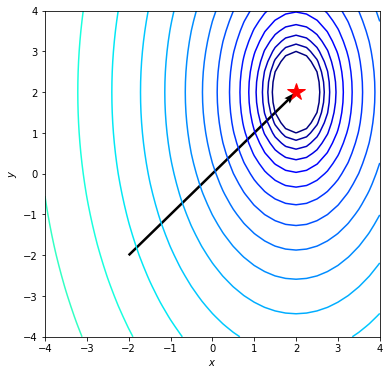

In [37]:
contour_with_path(f, x, y, paths, minima=np.array([[2],[2]]))

### Steepest Descent vs. Newton Method

0 [-3. -3.] 100.0
1 [ 27.   7.] 1900.0
2 [-123.   -3.] 46900.0
3 [ 627.    7.] 1171900.0
4 [ -3.12300000e+03  -3.00000000e+00] 29296900.0
5 [  1.56270000e+04   7.00000000e+00] 732421900.0
6 [ -7.81230000e+04  -3.00000000e+00] 18310546900.0
7 [  3.90627000e+05   7.00000000e+00] 457763671900.0
8 [ -1.95312300e+06  -3.00000000e+00] 1.14440917969e+13
9 [  9.76562700e+06   7.00000000e+00] 2.86102294922e+14


/Users/jacob/anaconda/envs/fastcampus/lib/python3.6/site-packages/matplotlib/contour.py:1518: UserWarning: Log scale: values of z <= 0 have been masked
  warnings.warn('Log scale: values of z <= 0 have been masked')


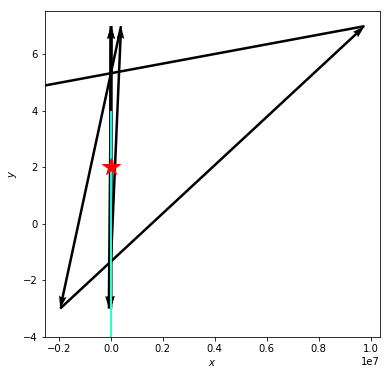

In [38]:
from numerical_optimizers import steepest_descent_2d
x0 = np.array([-3., -3.])
learning_rate = 1
xopt, fopt, paths, fval_paths = steepest_descent_2d(f, grad_f_x, grad_f_y, x0, 
                                                    learning_rate=learning_rate)
contour_with_path(f, x, y, paths, minima=np.array([[2],[2]]))

0 [-3. -3.] 100.0
1 [ 4.5 -0.5] 25.0
2 [ 0.75  0.75] 6.25
3 [ 2.625  1.375] 1.5625
4 [ 1.6875  1.6875] 0.390625
5 [ 2.15625  1.84375] 0.09765625
6 [ 1.921875  1.921875] 0.0244140625
7 [ 2.0390625  1.9609375] 0.006103515625
8 [ 1.98046875  1.98046875] 0.00152587890625
9 [ 2.00976562  1.99023438] 0.000381469726562


/Users/jacob/anaconda/envs/fastcampus/lib/python3.6/site-packages/matplotlib/contour.py:1518: UserWarning: Log scale: values of z <= 0 have been masked
  warnings.warn('Log scale: values of z <= 0 have been masked')


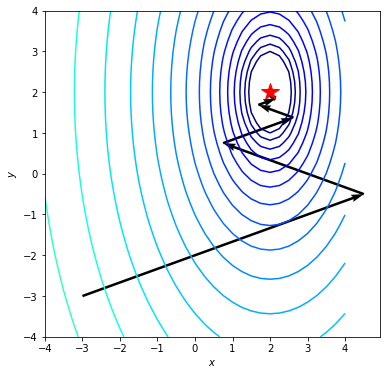

In [39]:
from numerical_optimizers import steepest_descent_2d
x0 = np.array([-3., -3.])
learning_rate = 0.25
xopt, fopt, paths, fval_paths = steepest_descent_2d(f, grad_f_x, grad_f_y, x0, 
                                                    learning_rate=learning_rate)
contour_with_path(f, x, y, paths, minima=np.array([[2],[2]]))

0 [-2. -3.] 73.0
1 [ 2.  2.] 0.0
2 [ 2.  2.] 0.0
3 [ 2.  2.] 0.0
4 [ 2.  2.] 0.0
5 [ 2.  2.] 0.0
6 [ 2.  2.] 0.0
7 [ 2.  2.] 0.0
8 [ 2.  2.] 0.0
9 [ 2.  2.] 0.0


/Users/jacob/anaconda/envs/fastcampus/lib/python3.6/site-packages/matplotlib/contour.py:1518: UserWarning: Log scale: values of z <= 0 have been masked
  warnings.warn('Log scale: values of z <= 0 have been masked')


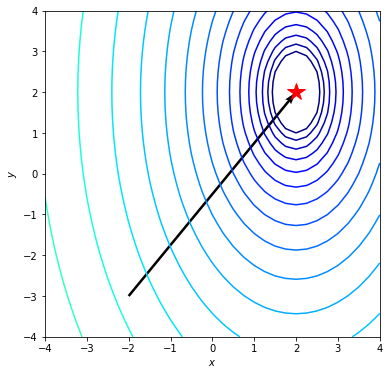

In [40]:
x0 = np.array([-2., -3.])
learning_rate = 1.0
xopt, fopt, paths, fval_paths = newton_descent_2d(f, grad_f_x, grad_f_y, hessian_f, x0,
                                                 learning_rate=learning_rate)
contour_with_path(f, x, y, paths, minima=np.array([[2],[2]]))

0 [-2. -3.] 73.0
1 [ 0.  -0.5] 18.25
2 [ 1.    0.75] 4.5625
3 [ 1.5    1.375] 1.140625
4 [ 1.75    1.6875] 0.28515625
5 [ 1.875    1.84375] 0.0712890625
6 [ 1.9375    1.921875] 0.017822265625
7 [ 1.96875    1.9609375] 0.00445556640625
8 [ 1.984375    1.98046875] 0.00111389160156
9 [ 1.9921875   1.99023438] 0.000278472900391


/Users/jacob/anaconda/envs/fastcampus/lib/python3.6/site-packages/matplotlib/contour.py:1518: UserWarning: Log scale: values of z <= 0 have been masked
  warnings.warn('Log scale: values of z <= 0 have been masked')


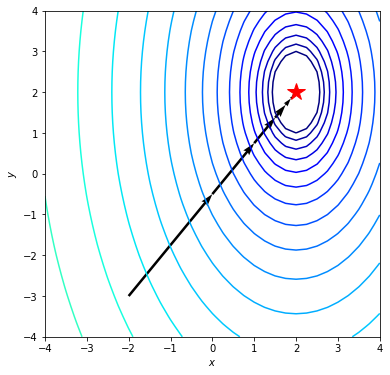

In [41]:
x0 = np.array([-2., -3.])
learning_rate = 0.5
xopt, fopt, paths, fval_paths = newton_descent_2d(f, grad_f_x, grad_f_y, hessian_f, x0,
                                                 learning_rate=learning_rate)
contour_with_path(f, x, y, paths, minima=np.array([[2],[2]]))